In [1]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Rutas De Archivos
base_dir = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Base_Datos"
ruta_csv_labs     = f"{base_dir}/Laboratorios_limpio.csv"
ruta_csv_findrisk = f"{base_dir}/Findrisk_limpio.csv"

ruta_salida="/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Modelos_ML/"

In [3]:
# Load the Glucosa_Unique.csv dataset, filter to women, and preview
import pandas as pd

# Read CSV with provided encoding
file_path = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Glucosa_Unique.csv"


df_glu = pd.read_csv(file_path, encoding='utf-8')

# Basic cleaning: unify column names to lower for easier access
df_glu.columns = [str(c).strip() for c in df_glu.columns]

# Filter to female records; columns present include 'sexo' where 'F' appears in preview
df_women = df_glu[df_glu['sexo'].astype(str).str.upper().str.strip().isin(['F', 'FEMENINO'])].copy()

df_women

Identificacion                    Nombre_Completo  Edad_A√±os   Examen  \
0       1002793817       ANYI CATHERINE BOTOTO CHOCUE       25.0  Glucosa   
1       1006732340        LESLY JULIET CRUZ MANIHUARI       23.0  Glucosa   
2       1006842257         KAREN LORENA RAMIREZ ARIAS       27.0  Glucosa   
3       1006842959  ESNEDI YOLIMA HERNANDEZ HERNANDEZ       26.0  Glucosa   
4       1006846193             KAREN MAYERLY MARTINEZ       24.0  Glucosa   
..             ...                                ...        ...      ...   
95        69028061           CONSUELO  SILVA ALVARADO       47.0  Glucosa   
96        69028393                   MARIA DANIA MEZA       46.0  Glucosa   
97        69028799             LUZ DARY JURADO ORTEGA       47.0  Glucosa   
98        69028973        MARIA ELENA LAGOS RODRIGUEZ       53.0  Glucosa   
99        69029353             MARIA ESPERANZA CADENA       66.0  Glucosa   

   Fecha_Examen      Grupo_Analito  Analito  Resultado     Regimen  \
0    2025-09-08  QUIMICA SANGUINEA  Glucosa      105.5  SUBSIDIADO   
1    2025-09-01  QUIMICA SANGUINEA  Glucosa      112.7  SUBSIDIADO   
2    2025-09-09  QUIMICA SANGUINEA  Glucosa       89.0  SUBSIDIADO   
3    2025-09-05  QUIMICA SANGUINEA  Glucosa       89.4  SUBSIDIADO   
4    2025-09-02  QUIMICA SANGUINEA  Glucosa      101.2  SUBSIDIADO   
..          ...                ...      ...        ...         ...   
95   2025-09-03  QUIMICA SANGUINEA  Glucosa       97.1  SUBSIDIADO   
96   2025-09-09  QUIMICA SANGUINEA  Glucosa       98.7  SUBSIDIADO   
97   2025-09-09  QUIMICA SANGUINEA  Glucosa       94.4  SUBSIDIADO   
98   2025-09-01  QUIMICA SANGUINEA  Glucosa      107.4  SUBSIDIADO   
99   2025-09-03  QUIMICA SANGUINEA  Glucosa       94.3  SUBSIDIADO   

    identificacion  ...                          Dx_Diabetes_Tipo2_Familia  \
0       1002793817  ...  Si: Abuelos, Tios o Primos Hermanos (pero no P...   
1       1006732340  ...                                                 No   
2       1006842257  ...                                                 No   
3       1006842959  ...  Si: Abuelos, Tios o Primos Hermanos (pero no P...   
4       1006846193  ...                                                 No   
..             ...  ...                                                ...   
95        69028061  ...                       Si: Padres, Hermanos o Hijos   
96        69028393  ...                                                 No   
97        69028799  ...                       Si: Padres, Hermanos o Hijos   
98        69028973  ...                                                 No   
99        69029353  ...                                                 No   

    puntaje_total  Dm tipo_dm Consumo_Cigarrillo Dx Enfermedad Cardiovascular  \
0            13.0  No     uno                  1                           no   
1            10.0  No     uno                  1                           no   
2             6.0  No     uno                  1                           no   
3            10.0  No     uno                  1                           no   
4             8.0  No     uno                  1                           no   
..            ...  ..     ...                ...                          ...   
95           15.0  No     uno                  1                           no   
96            4.0  No     uno                  1                           no   
97           17.0  No     uno                  1                           no   
98            8.0  No     uno                  1                           no   
99            6.0  No     uno                  1                           no   

    riesgo_dm                               interpretacion  \
0        17.0             Nivel Riesgo Moderado (Amarillo)   
1         4.0  Nivel Riesgo Ligeramente Elevado (Amarillo)   
2         0.0                    Nivel Riesgo Bajo (Verde)   
3         4.0  Nivel Riesgo Ligeramente Elevado (Amarillo)   
4         4.0  Ni

# Modelos Machine Inicales

R¬≤ (test) = 0.280


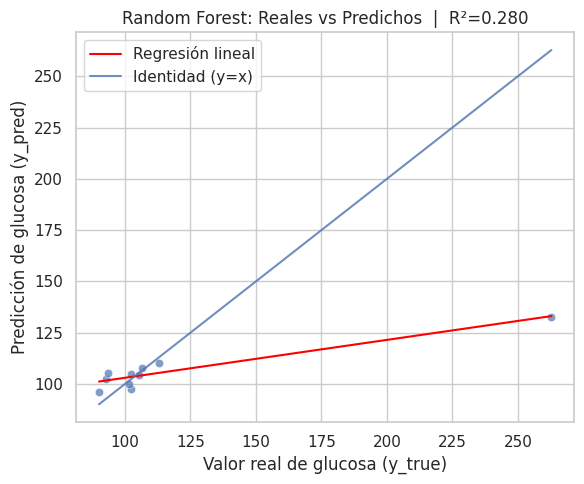

In [19]:
# ============================================================
# @title  RandomForestRegressor para predecir la glucosa (Resultado)
# en mujeres, con partici√≥n 70/30, c√°lculo de R¬≤ y gr√°fico
# y_true vs y_pred con l√≠nea de regresi√≥n (y l√≠nea identidad opcional).
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1) Punto de partida: se asume que ya existe df_women
#    (DataFrame previamente filtrado SOLO a mujeres).
#    Si tambi√©n quieres asegurar que sea solo "Glucosa", podr√≠as filtrar:
#    df_women = df_women[df_women['Analito'].str.contains('gluc', case=False, na=False)]
# ------------------------------------------------------------

# Nombre de la columna objetivo (valor de glucosa)
target_col = 'Resultado'

# 2) Quitar filas donde la variable objetivo est√© vac√≠a (NaN)
df_w = df_women.dropna(subset=[target_col]).copy()

# 3) Selecci√≥n de columnas de entrada (features):
#    - Excluimos identificadores obvios, fechas y columnas que podr√≠an fugar informaci√≥n
#      del propio resultado (como 'Analito' o 'Examen').
exclude_cols = [
    'Resultado', 'Identificacion', 'identificacion', 'Nombre_Completo', 'nombres',
    'apellidos', 'Fecha_Examen', 'Fecha_Fin_Registro', 'fecha_nacimiento',
    'responsable_registro', 'servicio', 'Examen', 'Analito'
]
# (Opcional) A√±ade aqu√≠ otras columnas derivadas del examen que puedan fugar info:
# leaky = ['interpretacion','Niveles_Altos_Glucosa','riesgo_dm','Dm','tipo_dm']
# exclude_cols += [c for c in leaky if c in df_w.columns]

feat_cols = [c for c in df_w.columns if c not in exclude_cols]

# 4) Separar X (features) e y (objetivo)
X = df_w[feat_cols]
# Si tus n√∫meros pueden venir con coma decimal, usa:
# y = pd.to_numeric(df_w[target_col].astype(str).str.replace(",", ".", regex=False), errors='coerce')
y = pd.to_numeric(df_w[target_col], errors='coerce')

# 5) Quitar filas donde y no sea num√©rica despu√©s de la conversi√≥n
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# 6) Identificar columnas num√©ricas y categ√≥ricas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# 7) Preprocesamiento:
#    - Num√©ricas: imputaci√≥n por mediana
#    - Categ√≥ricas: imputaci√≥n por m√°s frecuente + One-Hot Encoding
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 8) Modelo: Random Forest (300 √°rboles, semilla fija para reproducibilidad)
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

# 9) Pipeline completo: preprocesamiento + modelo
model = Pipeline(steps=[('preprocess', preprocess), ('rf', rf)])

# 10) Partici√≥n 70/30 (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# 11) Entrenar el modelo
model.fit(X_train, y_train)

# 12) Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 13) M√©trica principal: R¬≤ (entre 0 y 1; m√°s alto es mejor)
r2 = r2_score(y_test, y_pred)
print(f"R¬≤ (test) = {r2:.3f}")

# ------------------------------------------------------------
# 14) Gr√°fico de dispersi√≥n y_true vs y_pred
#     - Puntos: (y_real, y_predicha)
#     - L√≠nea ROJA: regresi√≥n lineal simple para visualizar tendencia
#     - L√≠nea AZUL (opcional): identidad y = x (predicci√≥n perfecta)
#     - El R¬≤ se muestra en el t√≠tulo.
# ------------------------------------------------------------
sns.set(style='whitegrid')
plt.figure(figsize=(6,5))

# Dispersi√≥n
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# L√≠nea de regresi√≥n (ROJA) para visualizar tendencia global
coef = np.polyfit(y_test, y_pred, 1)
poly1d_fn = np.poly1d(coef)
xs = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(xs, poly1d_fn(xs), color='red', label='Regresi√≥n lineal')

# (Opcional) L√≠nea identidad y = x (AZUL) para comparar calibraci√≥n
plt.plot(xs, xs, color='C0', alpha=0.8, label='Identidad (y=x)')

# Etiquetas y t√≠tulo con el R¬≤
plt.xlabel('Valor real de glucosa (y_true)')
plt.ylabel('Predicci√≥n de glucosa (y_pred)')
plt.title(f'Random Forest: Reales vs Predichos  |  R¬≤={r2:.3f}')

plt.legend()
plt.tight_layout()
plt.show()


Qu√© hace (de principio a fin)

1. **Punto de partida:** usa `df_women`, que ya viene filtrado a **mujeres**.
   *(Opcional: si existe `Analito`, podr√≠as filtrar a ‚ÄúGlucosa‚Äù).*

2. **Objetivo (y):** toma la columna `Resultado` como valor de glucosa; elimina filas sin dato.

3. **Features (X):** usa todas las columnas **menos** identificadores, fechas y campos que podr√≠an filtrar informaci√≥n del propio examen (`Resultado`, `Identificacion`, `Examen`, `Analito`, etc.).

4. **Tipos de variables:**

   * **Num√©ricas:** se imputan valores faltantes con **mediana**.
   * **Categ√≥ricas:** se imputan con **moda** y se codifican con **One-Hot** (ColumnTransformer).

5. **Modelo:** entrena un **RandomForestRegressor** (300 √°rboles, `random_state=42`) dentro de un **Pipeline** que primero preprocesa y luego ajusta.

6. **Partici√≥n 70/30:** `train_test_split(test_size=0.30, random_state=42)` para tener **entrenamiento** y **prueba**.

7. **Evaluaci√≥n:** predice en el 30% de prueba y calcula **R¬≤**.

   * **R¬≤** ‚àà \[‚àí‚àû,1]: 1 es perfecto; 0 significa que no mejora a predecir la media; valores negativos indican peor que la media.

8. **Gr√°fica:**

   * Puntos = (valor real, predicci√≥n).
   * **L√≠nea roja** = regresi√≥n lineal ‚Äúvisual‚Äù de esos puntos (solo referencia).
   * **(Opcional) L√≠nea identidad** `y=x` = predicci√≥n perfecta.
   * El **R¬≤** aparece en el **t√≠tulo** de la figura.

C√≥mo interpretarlo (r√°pido)

* Si los puntos se pegan a la **l√≠nea identidad**, el modelo **acierta**.
* Si la **l√≠nea roja** queda **por debajo** de la identidad en valores altos, el modelo **subestima** los altos (sesgo a la baja).
* Un **R¬≤** consistente (>0.5, por ejemplo) sugiere que el modelo captura buena parte de la variabilidad; si es bajo, faltan features, hay ruido o outliers influyentes.

 C√≥mo contarlo a un p√∫blico no t√©cnico

> ‚ÄúEntrenamos un modelo de bosque aleatorio con el 70% de los datos y lo probamos con el 30% restante. El modelo aprende relaciones entre variables cl√≠nicas y el valor de glucosa. Medimos su desempe√±o con R¬≤ (qu√© tan bien explica la variaci√≥n real). En la gr√°fica, cada punto compara el valor real vs la predicci√≥n; la l√≠nea azul ser√≠a el ideal (y=x) y la roja muestra la tendencia de nuestras predicciones. Un R¬≤ alto y puntos cerca de la l√≠nea indican buen ajuste.‚Äù

Buenas pr√°cticas (para que el resultado sea confiable)

* **Evitar fuga de informaci√≥n:** no incluir columnas derivadas del mismo examen, p. ej. `interpretacion`, `Niveles_Altos_Glucosa`, `riesgo_dm`, `Dm`, `tipo_dm`.
* **Confirmar unidades/condici√≥n de la prueba** (ayuno/posprandial/OGTT) para casos extremos.
* **Repetibilidad:** `random_state=42` fija el split.
* **Robustez:** si te lo piden, haz **CV 5-fold** y reporta promedio de R¬≤.






[TRAIN] R2=0.859 | MAE=5.70 | RMSE=13.68 | n=90
[TEST ] R2=0.280 | MAE=17.15 | RMSE=41.58 | n=10


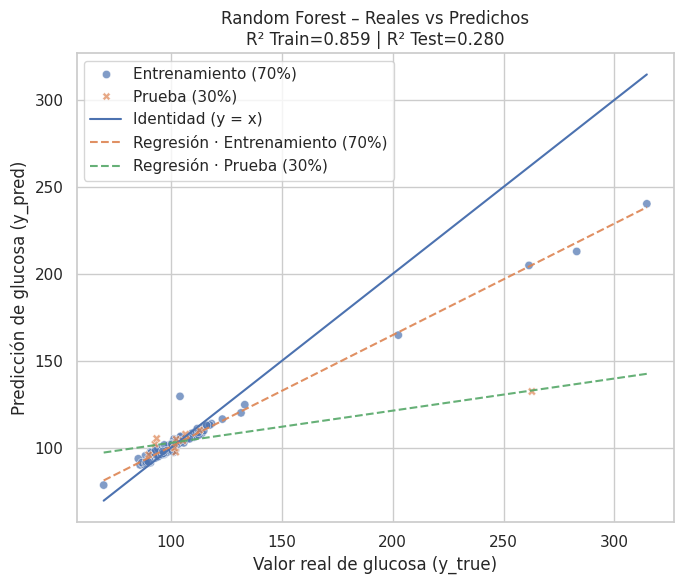

In [20]:
# ============================================
# @title Predicciones y m√©tricas por split (Train/Test)
# + Gr√°fico conjunto con ambos splits
# ============================================
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Predicciones en train y test
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# 2) M√©tricas por split
r2_tr  = r2_score(y_train, y_pred_train)
mae_tr = mean_absolute_error(y_train, y_pred_train)
rmse_tr = float(np.sqrt(mean_squared_error(y_train, y_pred_train)))

r2_te  = r2_score(y_test, y_pred_test)
mae_te = mean_absolute_error(y_test, y_pred_test)
rmse_te = float(np.sqrt(mean_squared_error(y_test, y_pred_test)))

print(f"[TRAIN] R2={r2_tr:.3f} | MAE={mae_tr:.2f} | RMSE={rmse_tr:.2f} | n={len(y_train)}")
print(f"[TEST ] R2={r2_te:.3f} | MAE={mae_te:.2f} | RMSE={rmse_te:.2f} | n={len(y_test)}")

# 3) Armar DataFrame para graficar con seaborn
df_plot_train = pd.DataFrame({
    "y_true": y_train.values,
    "y_pred": y_pred_train,
    "split": "Entrenamiento (70%)"
})
df_plot_test = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_test,
    "split": "Prueba (30%)"
})
df_plot = pd.concat([df_plot_train, df_plot_test], axis=0, ignore_index=True)

# 4) Rango com√∫n para la l√≠nea identidad y regresi√≥n
min_val = float(min(df_plot["y_true"].min(), df_plot["y_pred"].min()))
max_val = float(max(df_plot["y_true"].max(), df_plot["y_pred"].max()))
xs = np.linspace(min_val, max_val, 200)

# 5) Gr√°fico: puntos de ambos splits + l√≠nea identidad + (opcional) rectas de regresi√≥n por split
sns.set(style="whitegrid")
plt.figure(figsize=(7,6))

# Dispersi√≥n, diferenciando por split
sns.scatterplot(
    data=df_plot, x="y_true", y="y_pred",
    hue="split", style="split", alpha=0.7
)

# L√≠nea identidad (predicci√≥n perfecta)
plt.plot(xs, xs, label="Identidad (y = x)")

# (Opcional) Regresi√≥n lineal por split para ver sesgo
for etiqueta, data_sub in df_plot.groupby("split"):
    coef = np.polyfit(data_sub["y_true"], data_sub["y_pred"], 1)
    y_line = np.poly1d(coef)(xs)
    plt.plot(xs, y_line, linestyle="--", alpha=0.9, label=f"Regresi√≥n ¬∑ {etiqueta}")

# T√≠tulo con R¬≤ de ambos splits
plt.title(
    f"Random Forest ‚Äì Reales vs Predichos\n"
    f"R¬≤ Train={r2_tr:.3f} | R¬≤ Test={r2_te:.3f}"
)
plt.xlabel("Valor real de glucosa (y_true)")
plt.ylabel("Predicci√≥n de glucosa (y_pred)")
plt.legend()
plt.tight_layout()
plt.show()



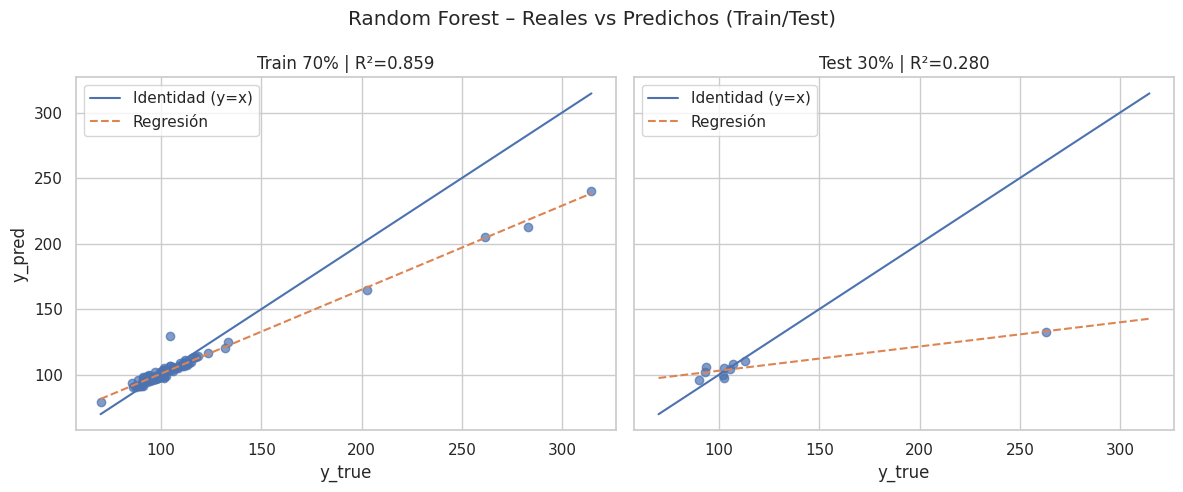

In [21]:
# @title Graficos separados

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

# TRAIN
axes[0].scatter(y_train, y_pred_train, alpha=0.7)
axes[0].plot(xs, xs, label="Identidad (y=x)")
coef_tr = np.polyfit(y_train, y_pred_train, 1)
axes[0].plot(xs, np.poly1d(coef_tr)(xs), linestyle="--", label="Regresi√≥n")
axes[0].set_title(f"Train 70% | R¬≤={r2_tr:.3f}")
axes[0].set_xlabel("y_true")
axes[0].set_ylabel("y_pred")
axes[0].legend()

# TEST
axes[1].scatter(y_test, y_pred_test, alpha=0.7)
axes[1].plot(xs, xs, label="Identidad (y=x)")
coef_te = np.polyfit(y_test, y_pred_test, 1)
axes[1].plot(xs, np.poly1d(coef_te)(xs), linestyle="--", label="Regresi√≥n")
axes[1].set_title(f"Test 30% | R¬≤={r2_te:.3f}")
axes[1].set_xlabel("y_true")
axes[1].legend()

plt.suptitle("Random Forest ‚Äì Reales vs Predichos (Train/Test)")
plt.tight_layout()
plt.show()



In [15]:
# @title Exportar SOLO el modelo en formato .joblib a tu Drive
from google.colab import drive
import os, joblib
from datetime import datetime

# Montar Drive (si no est√°)


OUTPUT_DIR = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Nombre con timestamp para versionar
ts = datetime.now().strftime("%Y%m%d")
MODEL_PATH = os.path.join(OUTPUT_DIR, f"RF_GlucosaMujeres_{ts}.joblib")

# Guarda el pipeline completo (prepro + modelo)
joblib.dump(model, MODEL_PATH, compress=3)

print("Modelo guardado en:", MODEL_PATH)


Modelo guardado en: /content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250922.joblib


# Pruebas Modelo Con datos

In [22]:
# ============================================================
# @title  Ingresar datos MANUALMENTE y predecir con .joblib
# - Pide peso y talla y calcula IMC autom√°ticamente
# ============================================================
import os, numpy as np, pandas as pd, joblib

# 1) Cargar el modelo (pipeline completo)
MODEL_PATH = "/content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250917.joblib"  # <-- cambia por tu ruta real
pipe = joblib.load(MODEL_PATH)
print("Modelo cargado desde:", MODEL_PATH)

# 2) Descubrir columnas esperadas
pre = pipe.named_steps['preprocess']
num_cols, cat_cols = [], []
for name, transformer, cols in pre.transformers_:
    if name == 'num':
        num_cols = list(cols)
    elif name == 'cat':
        cat_cols = list(cols)
feature_cols = num_cols + cat_cols
print(f"Features esperadas: {len(feature_cols)}")

# (Opcional) categor√≠as conocidas de cada variable categ√≥rica
categories_map = {}
try:
    ohe = pre.named_transformers_['cat'].named_steps.get('onehot', None)
    if ohe is not None:
        categories_map = {col: list(cats) for col, cats in zip(cat_cols, ohe.categories_)}
except Exception:
    pass

# 3) Columnas que VAS a digitar manualmente:
#    (quitamos 'imc' y en su lugar pedimos 'peso' y 'talla')
FEATURES_TO_ASK = [
    "edad", "tas", "tad", "perimetro_abdominal",
    "peso", "talla",                  # <-- se piden y de ah√≠ se calcula IMC
    "realiza_ejercicio", "frecuencia_frutas", "medicamentos_hta"
]
FEATURES_TO_ASK = [c for c in FEATURES_TO_ASK if c in feature_cols or c in ["peso","talla"]]
assert len(FEATURES_TO_ASK) > 0, "Ninguna de las FEATURES_TO_ASK est√° en el modelo. Revisa nombres."

def ask_value(col):
    """Pregunta el valor de una columna; devuelve float para num√©ricas y str para categ√≥ricas."""
    is_num = (col in num_cols) or (col in ["peso","talla"])  # tratamos peso/talla como num√©ricos
    prompt = f"- {col} ({'num' if is_num else 'cat'})"
    if not is_num and col in categories_map and len(categories_map[col]) <= 12:
        prompt += f" | opciones: {categories_map[col]}"
    prompt += " -> "
    val = input(prompt).strip()
    if val == "":
        return None
    if is_num:
        val = val.replace(",", ".")
        try:
            return float(val)
        except:
            print(f"‚ö†Ô∏è No pude convertir '{val}' en n√∫mero. Se usar√° NaN.")
            return None
    else:
        return val

def compute_imc_from(peso, talla):
    """Calcula IMC (= kg / m^2). Si talla > 3, se asume cm para el c√°lculo."""
    if peso is None or talla is None:
        return None
    try:
        p = float(peso)
        t = float(talla)
        t_m = t/100.0 if t > 3 else t  # si parece cm, convierto a m SOLO para el IMC
        if p <= 0 or t_m <= 0:
            return None
        return round(p / (t_m**2), 2)
    except Exception:
        return None

def prepare_row(input_dict):
    """Alinea un dict a las columnas que espera el modelo y calcula IMC si aplica."""
    row = {c: np.nan for c in feature_cols}
    # Copiar valores solo si est√°n en las features esperadas
    for k, v in input_dict.items():
        if k in row:
            row[k] = v
    # Calcular IMC si la columna 'imc' existe en el modelo
    if "imc" in feature_cols:
        imc_val = compute_imc_from(input_dict.get("peso"), input_dict.get("talla"))
        if imc_val is not None:
            row["imc"] = imc_val
            print(f"‚ÑπÔ∏è IMC calculado autom√°ticamente: {imc_val}")
        else:
            print("‚ö†Ô∏è No se pudo calcular IMC (faltan datos o valores inv√°lidos).")
    # Coerci√≥n num√©rica para columnas num√©ricas
    df_one = pd.DataFrame([row])
    for c in num_cols:
        df_one[c] = pd.to_numeric(df_one[c], errors="coerce")
    return df_one

print("\nüí° Nota: ingresa 'talla' en las MISMAS unidades usadas al entrenar el modelo (probablemente cm).")
print("El IMC se calcula en base a metros (si escribes cm, el c√°lculo lo convierte a m autom√°ticamente).")

# 4) Bucle interactivo
while True:
    print("\n=== Ingreso manual de datos (Enter para dejar en blanco) ===")
    answers = {}
    for col in FEATURES_TO_ASK:
        answers[col] = ask_value(col)

    X_one = prepare_row(answers)
    y_pred = float(pipe.predict(X_one)[0])
    print(f"\n‚úÖ Predicci√≥n esperada de glucosa: {y_pred:.2f} mg/dL")

    cont = input("\n¬øOtra predicci√≥n? (s/n): ").strip().lower()
    if cont != "s":
        break


Modelo cargado desde: /content/drive/MyDrive/INNprende/2 - Desarrollo de Modelos de ML y DL pa- ra Biomarcadores Digitales/2.2 Prototipo Funcional de Modelos Iniciales/Algoritmos/Delfos|A1C1/RF_GlucosaMujeres_20250917.joblib
Features esperadas: 38

üí° Nota: ingresa 'talla' en las MISMAS unidades usadas al entrenar el modelo (probablemente cm).
El IMC se calcula en base a metros (si escribes cm, el c√°lculo lo convierte a m autom√°ticamente).

=== Ingreso manual de datos (Enter para dejar en blanco) ===
- edad (num) -> 33
- tas (num) -> 120
- tad (num) -> 60
- perimetro_abdominal (num) -> 85
- peso (num) -> 70
- talla (num) -> 173
- realiza_ejercicio (cat) | opciones: ['NO', 'SI'] -> no
- frecuencia_frutas (cat) | opciones: ['NO', 'SI'] -> no
- medicamentos_hta (cat) | opciones: ['NO', 'SI'] -> no
‚ÑπÔ∏è IMC calculado autom√°ticamente: 23.39

‚úÖ Predicci√≥n esperada de glucosa: 95.92 mg/dL

¬øOtra predicci√≥n? (s/n): b
